In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",40)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df = pd.read_csv("combined.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

### Remove unwanted features

In [ ]:
df = df.drop(['damage_grade'], axis=1)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
#save to csv
#df.to_csv("combined.csv",index=False)

In [ ]:
df1 = pd.read_csv("selected.csv")

In [ ]:
df1.info()

### Encode the categorical features

In [ ]:
df['land_surface_condition'].value_counts()

In [ ]:
df['foundation_type'].value_counts()

In [ ]:
le = LabelEncoder()

In [ ]:
df_land = le.fit_transform(df['land_surface_condition'])

In [ ]:
df_land

In [ ]:
df_found = le.fit_transform(df['foundation_type'])

In [ ]:
df_found

In [ ]:
df_land = pd.DataFrame(df_land, columns=['land_surface_condition'])

In [ ]:
df_land.head()

In [ ]:
df_land.nunique()

In [ ]:
df_found = pd.DataFrame(df_found, columns=['foundation_type'])

In [ ]:
df_found.head()

In [ ]:
df_found.nunique()

In [ ]:
df.head()

In [ ]:
df2 = df.drop(['land_surface_condition','foundation_type'], axis=1)

In [ ]:
df2.head()

In [ ]:
df3 = pd.concat([df_land,df_found,df2],axis=1)

In [ ]:
df3.shape

In [ ]:
df3.head()

In [ ]:
#save to csv
#df3.to_csv("encoded.csv",index=False)

### One-hot encode 

### Rearrange the columns

In [ ]:
df3.info()

In [ ]:
df3 = df3[['count_floors_pre_eq','age','height','land_surface_condition','foundation_type',
          'has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',
          'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
          'has_superstructure_timber','has_superstructure_bamboo',
          'has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',
          'has_superstructure_other']]

In [ ]:
df3.head()

In [ ]:
#save to csv
#df3.to_csv("encoded.csv",index=False)

In [ ]:
df4 = pd.read_csv("encoded.csv")

In [ ]:
df4.info()

In [ ]:
df4.head()

In [ ]:
df4['land_surface_condition'] = df4['land_surface_condition'].astype('category')

In [ ]:
df4['land_surface_condition'].value_counts()

In [ ]:
df4['foundation_type'] = df4['foundation_type'].astype('category')

In [ ]:
df4['foundation_type'].value_counts()

In [ ]:
df4.info()

In [ ]:
df4_cat = df4[['land_surface_condition','foundation_type']]

In [ ]:
df4_cat.head()

In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
ohe1 = ohe.fit_transform(df4_cat).toarray()

In [ ]:
ohe_all = pd.DataFrame(ohe1)

In [ ]:
ohe_all

In [ ]:
ohe_all = ohe_all.rename(columns={0: "L1", 1: "L2", 2:"F1", 3:"F2", 4:"F3", 5:"F4"})

In [ ]:
ohe_all

In [ ]:
type(ohe_all)

In [ ]:
ohe_all.head()

In [ ]:
df5 = pd.concat([ohe_all,df4],axis=1)

In [ ]:
df5.head()

In [ ]:
df5.shape

In [ ]:
df5 = df5.drop(['land_surface_condition','foundation_type'],axis=1)

In [ ]:
df5.shape

In [ ]:
df5.head()

In [ ]:
df6 = df5[['count_floors_pre_eq','age','height','L1','L2','F1','F2','F3','F4',
          'has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone',
          'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
          'has_superstructure_timber','has_superstructure_bamboo',
          'has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',
          'has_superstructure_other']]

In [ ]:
df6

In [ ]:
#save to csv
#df6.to_csv("combinecleaned.csv",index=False)

In [ ]:
df6 = pd.read_csv("combinecleaned.csv")

In [ ]:
df6.head()

In [ ]:
df6.describe()

### Check for outliers

In [ ]:
sns.distplot(a=df6.count_floors_pre_eq,kde=False)

In [ ]:
sns.distplot(a=df6.age,kde=False) #Only Age has outliers

In [ ]:
sns.distplot(a=df6.height,kde=False)

In [ ]:
df6.quantile(q=0.05,axis=0)

In [ ]:
df6.quantile(q=0.95,axis=0)

In [ ]:
df6.age.value_counts()

### To ensure the validity of age data, those with 995, subsitute with age 200 as max
### Used Excel to save time

In [2]:
df7 = pd.read_csv("combinecleaned.csv")

In [3]:
df7

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,2,25,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3,15,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,20,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,2,5,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96863,3,70,6,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
96864,3,25,7,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
96865,1,50,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
96866,2,5,5,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [4]:
df7['age'].value_counts()

10     14265
15     13437
5      12627
20     11846
0       9668
25      9219
30      6637
35      4085
40      3896
50      2660
45      1729
60      1313
80      1143
70       770
55       744
100      578
200      537
65       419
90       379
85       326
75       202
95       149
120       61
110       47
150       42
105       33
125       26
115        9
180        5
130        4
155        3
190        3
140        2
160        2
170        2
Name: age, dtype: int64

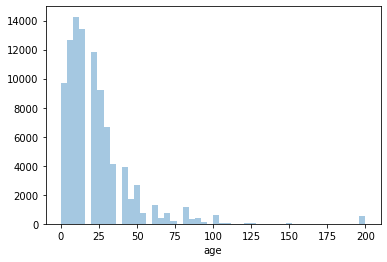

In [5]:
sns.distplot(a=df7.age,kde=False) #Only Age has outliers

### Apply MinMax transformation for numeric features

In [6]:
df7_num = df7[['count_floors_pre_eq','age','height']]

In [7]:
df7_num.head()

,count_floors_pre_eq,age,height
0,2,25,4
1,3,15,5
2,1,20,2
3,2,5,3
4,3,0,6


In [8]:
minmax = MinMaxScaler()

In [9]:
df7_mm = minmax.fit_transform(df7_num)

In [10]:
df7_mm

array([[0.125     , 0.125     , 0.09677419],
       [0.25      , 0.075     , 0.12903226],
       [0.        , 0.1       , 0.03225806],
       ...,
       [0.        , 0.25      , 0.06451613],
       [0.125     , 0.025     , 0.12903226],
       [0.125     , 0.05      , 0.09677419]])

In [11]:
df7_mm = pd.DataFrame(df7_mm, columns=df7_num.columns)

In [12]:
df7_mm

,count_floors_pre_eq,age,height
0,0.125,0.125,0.096774
1,0.250,0.075,0.129032
2,0.000,0.100,0.032258
3,0.125,0.025,0.064516
4,0.250,0.000,0.161290
...,...,...,...
96863,0.250,0.350,0.161290
96864,0.250,0.125,0.193548
96865,0.000,0.250,0.064516
96866,0.125,0.025,0.129032


In [14]:
df7 = df7.drop(['count_floors_pre_eq','age','height'],axis=1)

In [15]:
df7

,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96863,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
96864,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
96865,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
96866,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [16]:
df8 = pd.concat([df7_mm,df7],axis=1)

In [17]:
df8

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.125,0.125,0.096774,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.250,0.075,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.000,0.100,0.032258,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0.125,0.025,0.064516,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.250,0.000,0.161290,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96863,0.250,0.350,0.161290,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
96864,0.250,0.125,0.193548,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
96865,0.000,0.250,0.064516,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
96866,0.125,0.025,0.129032,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [18]:
df8.describe()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000,96868.000000
mean,0.141818,0.111595,0.140492,0.136547,0.830935,0.041035,0.053186,0.056954,0.005750,0.089926,0.762512,0.033995,0.018613,0.067597,0.073698,0.253799,0.084094,0.042243,0.015588,0.015093
std,0.091115,0.117193,0.061626,0.343370,0.374811,0.198373,0.224405,0.231756,0.075611,0.286078,0.425546,0.181216,0.135154,0.251055,0.261281,0.435186,0.277530,0.201144,0.123877,0.121922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.050000,0.096774,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.125000,0.075000,0.129032,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.125000,0.150000,0.161290,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#save to csv
#df8.to_csv("combinedtrans.csv",index=False)